# Declaration of Originality

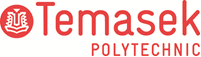

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Thiri War War Thein
* Tutorial Group                : P07
* Tutor						    : Ester Lee
* Submission Date               : 


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [44]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 1. Business Understanding
Goal: ?

# 2. Data Understanding

## 2.1 Load dataset

In [10]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "student_lifestyle_dataset..csv"
df = pd.read_csv(FILE_PATH)
df

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Stress_Level,Gender,Grades
0,1,6.9,3.8,8.7,2.8,1.8,Moderate,Male,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Low,Female,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Low,Male,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderate,Male,7.20
4,5,8.1,0.6,6.5,2.2,6.6,High,Male,8.78
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,Moderate,Male,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,Moderate,Female,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,Moderate,Male,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,High,Male,7.60


## 2.2 Summary Statistics

In [11]:
## Understand the type of variable for each column
df.head()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   Stress_Level                     2000 non-null   object 
 7   Gender                           2000 non-null   object 
 8   Grades                           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


(2000, 9)

In [12]:
df.nunique()

Student_ID                         2000
Study_Hours_Per_Day                  51
Extracurricular_Hours_Per_Day        41
Sleep_Hours_Per_Day                  51
Social_Hours_Per_Day                 61
Physical_Activity_Hours_Per_Day     118
Stress_Level                          3
Gender                                2
Grades                              158
dtype: int64

In [13]:
## Check for missing data
df.isna().sum()

Student_ID                         0
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Stress_Level                       0
Gender                             0
Grades                             0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# Check if any row has missing values
df.isnull().any(axis=1).sum()

np.int64(0)

In [16]:
## Describe data distribution
df.describe()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


In [17]:
df["Stress_Level"].value_counts()
df["Stress_Level"].value_counts(normalize=True)

Stress_Level
High        0.5145
Moderate    0.3370
Low         0.1485
Name: proportion, dtype: float64

In [18]:
# Separate numeric/categorical columns 
X_temp = df.drop(columns=["Stress_Level"])
cat_cols = X_temp.select_dtypes(include=["object"]).columns.tolist()
num_cols = X_temp.select_dtypes(exclude=["object"]).columns.tolist()

print("Categorical columns:", cat_cols)
print("Numeric columns:", num_cols)

Categorical columns: ['Gender']
Numeric columns: ['Student_ID', 'Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Grades']


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

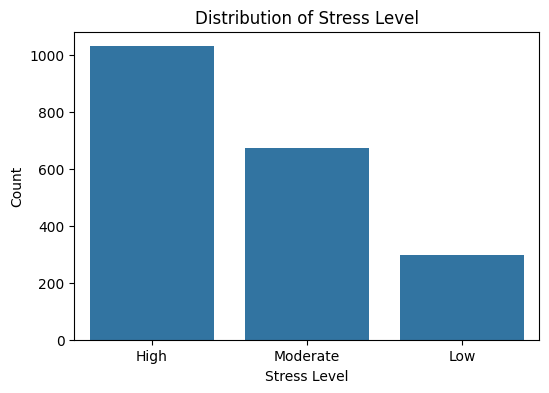

In [19]:
## Understanding distribution of target
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Stress_Level", order=df["Stress_Level"].value_counts().index)
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.title("Distribution of Stress Level")
plt.show()

The distribution of the target variable, Stress_Level, shows a clear imbalance among the three categories. The majority of students fall under the High stress category, followed by Moderate while Low stress represents the smallest proportion. This visualization is important because it highlights an inherent class imbalance in the dataset which can significantly affect model performance and evaluation. If a model simply predicts the majority class, it may achieve high accuracy without being truly informative. This observation suggests that accuracy alone may not be sufficient for evaluation and that additional metrics such as precision, recall, and F1-score should be considered later in the modeling stage.

### 2.3.1.2 Understanding distribution of features

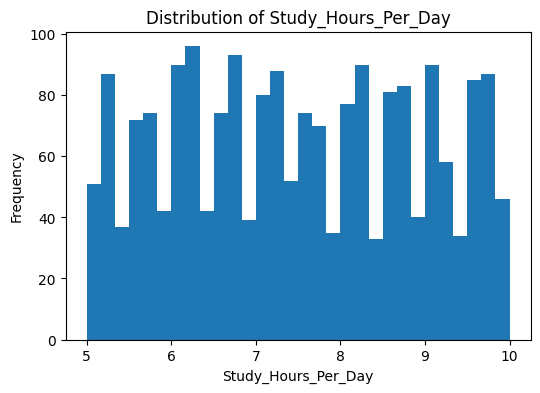

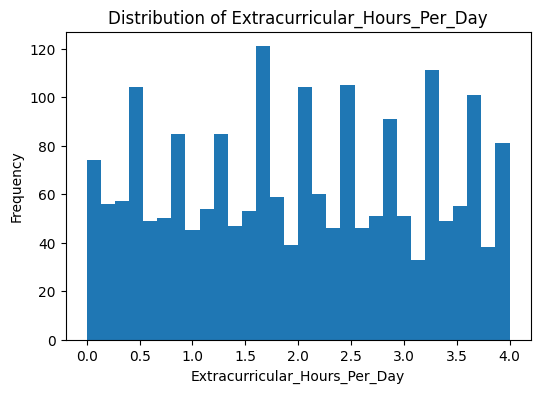

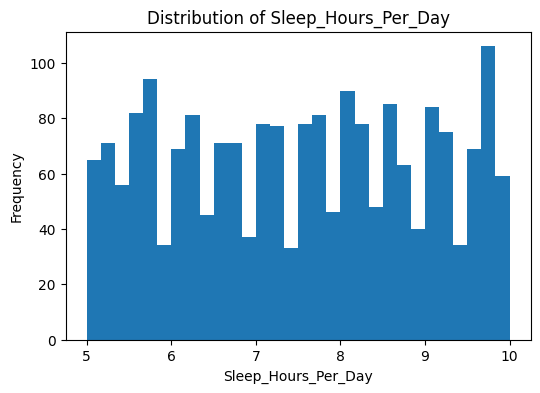

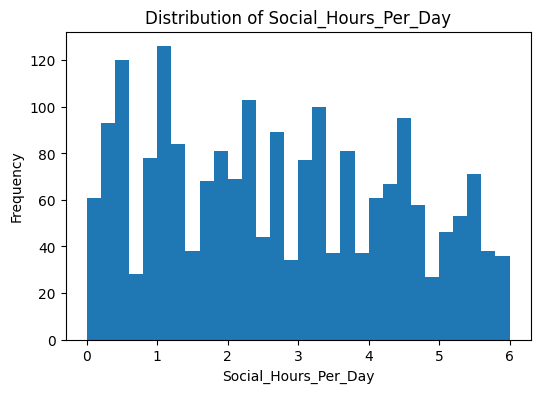

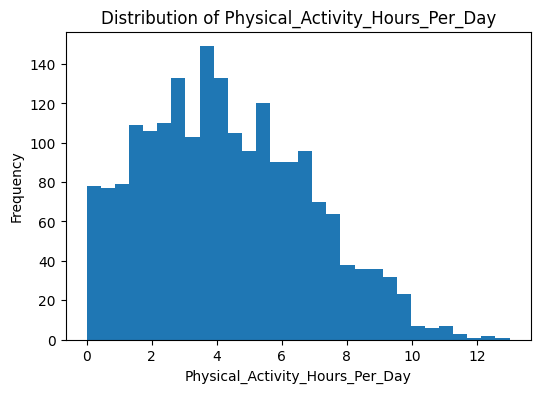

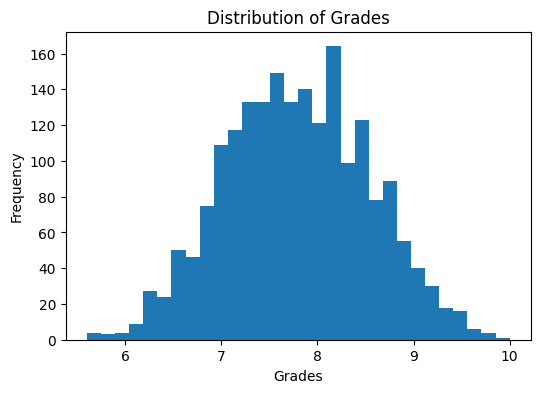

In [20]:
## Understanding distribution of features
num_features = [
    "Study_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "Grades"
]

for col in num_features:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


**Distribution of Study_Hours_Per_Day**

The histogram of daily study hours indicates that students study between approximately five and ten hours per day with the distribution spread relatively evenly across this range. There are no extreme spikes or gaps, suggesting that study habits vary consistently across the population. This distribution implies that study hours alone may not be a dominant predictor of stress but could interact with other factors such as sleep and extracurricular activities. The absence of extreme values also indicates that no immediate data cleaning is required for this feature.

**Distribution of Extracurricular_Hours_Per_Day**

The distribution of extracurricular hours per day ranges from zero to four hours with most students spending between one and three hours on such activities. This suggests that extracurricular involvement is common but generally moderate. Since extracurricular activities can act as either a stress reliever or an additional burden depending on the individual, this feature may play a meaningful role when analyzed in relation to stress levels. The values appear realistic and consistent, reinforcing the decision to retain this feature without transformation at this stage.

**Distribution of Sleep_Hours_Per_Day**

The histogram for sleep hours shows that most students sleep between five and ten hours per day with no strong skewness or concentration at extreme values. This relatively balanced distribution suggests that extreme sleep deprivation is uncommon in the dataset. While sleep is often associated with stress, the even spread indicates that stress levels may not be explained by sleep duration alone but rather by how sleep interacts with academic and social demands.

**Distribution of Social_Hours_Per_Day**

The distribution of Social_Hours_Per_Day spans from 0 to around 6 hours per day which shows noticeable variation across students. This indicates differences in social engagement which can influence stress both positively and negatively. Students with more social interaction may experience stress relief while those with limited social time may feel more isolated. The wide spread supports the inclusion of this feature in the model as it may contribute meaningful information about stress levels.

**Distribution of Physical_Activity_Hours_Per_Day**

The histogram for Physical_Activity_Hours_Per_Day shows a right-skewed distribution with most students engaging in low to moderate levels of physical activity and a smaller number reporting very high activity levels. This skewness is realistic and reflects differences in lifestyle. Physical activity is strongly linked to stress regulation so this feature is conceptually important. The presence of extreme values suggests the need to be mindful of outliers during modeling, though they may still represent valid real-world cases.

**Distribution of Grades**

The distribution of Grades appears approximately bell-shaped, centered around the mid-to-high range. This suggests that most students perform reasonably well academically with fewer students at the very low or very high ends. Grades are an important outcome variable related to academic pressure and stress. The smooth distribution indicates that grades can serve as a strong continuous predictor when examining relationships with stress level.

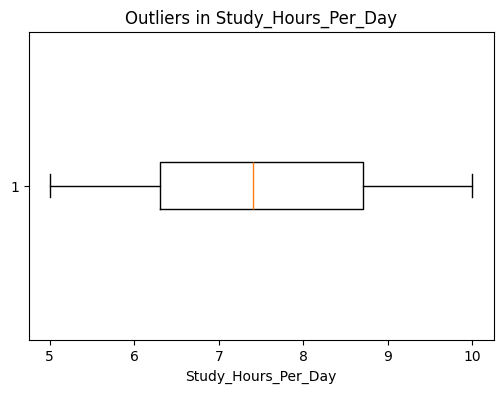

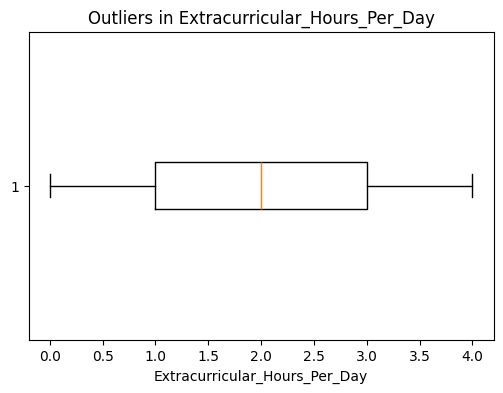

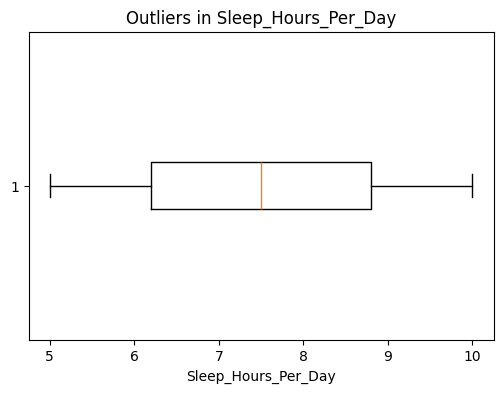

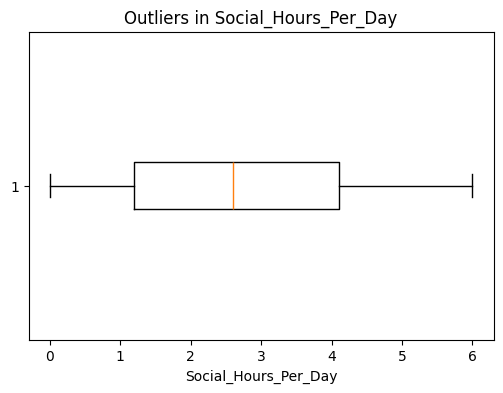

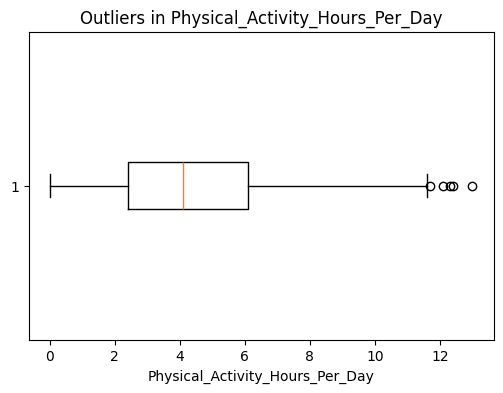

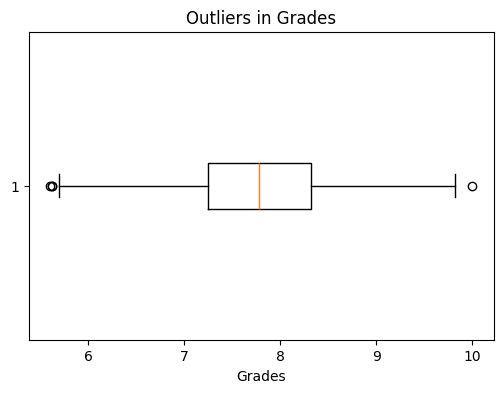

In [21]:
for col in num_features:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col], vert=False)
    plt.xlabel(col)
    plt.title(f"Outliers in {col}")
    plt.show()

**Box Plot: Study_Hours_Per_Day**

The box plot for Study_Hours_Per_Day shows that most students spend a moderate and fairly consistent amount of time studying each day. The median lies near the center of the box, indicating a balanced distribution of study hours across the dataset. The interquartile range (IQR) is not overly wide, suggesting that extreme variation in study habits is limited. There are no significant outliers beyond the whiskers which implies that study hours fall within a realistic and expected range. This indicates good data quality for this feature and no immediate cleaning is required. From a modeling perspective, this feature is stable and suitable for use without transformation.

**Box Plot: Extracurricular_Hours_Per_Day**

The box plot for Extracurricular_Hours_Per_Day shows a slightly wider spread compared to study hours reflecting greater variation in how much time students spend on extracurricular activities. The median is centered but the IQR is broader and it indicates that student participation levels differ more substantially. There are no extreme outliers meaning that even higher extracurricular involvement remains plausible. This suggests that extracurricular time is a meaningful behavioral variable rather than noise. Retaining this feature may help capture differences in lifestyle balance that could influence stress levels.

**Box Plot: Sleep_Hours_Per_Day**

The Sleep_Hours_Per_Day box plot shows a relatively symmetric distribution with a clear central tendency. Most students sleep within a healthy range, as indicated by the compact IQR and the absence of extreme outliers. This suggests that sleep patterns in the dataset are realistic and consistent. Since sleep is strongly linked to stress and mental well-being, the clean distribution strengthens its importance as a predictive feature. No outlier handling is necessary, and the feature can be directly used for modeling.

**Box Plot: Social_Hours_Per_Day**

The box plot for Social_Hours_Per_Day reveals a wider spread than sleep and study hours, indicating varied social behavior among students. The median lies slightly closer to the lower quartile which suggests that many students spend a modest amount of time socializing while fewer students report very high social hours. There are no extreme outliers which implies that even higher values are within a reasonable daily range. This variability makes social hours a potentially informative feature for stress prediction as both low and high social engagement may relate differently to stress levels.

**Box Plot: Physical_Activity_Hours_Per_Day**

The Physical_Activity_Hours_Per_Day box plot shows noticeable right-skewness with several high-end outliers extending beyond the upper whisker. These outliers represent students reporting unusually high physical activity hours per day. While these values may initially appear extreme, they are still plausible (eg, athletes or highly active individuals). Therefore, these points should not be automatically removed. Instead, their presence suggests that physical activity varies significantly across students which could have meaningful implications for stress levels. Retaining these values allows the model to learn patterns associated with both low and high physical activity.

**Box Plot: Grades**

The box plot for Grades displays a tightly clustered distribution with a narrow IQR and a median around the higher end of the grading scale. Only a small number of mild outliers appear at both the lower and upper ends. These outliers likely represent students performing exceptionally poorly or exceptionally well which are valid cases rather than data errors. Since grades are an important academic outcome and potentially related to stress, preserving this full range is important. The limited presence of outliers indicates strong data consistency and suggests no need for outlier removal.

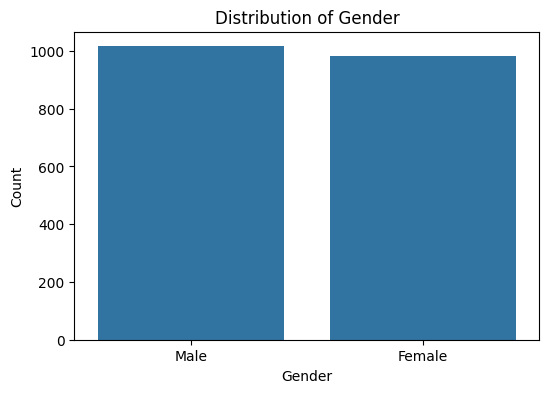

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", order=df["Gender"].value_counts().index)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

**Distribution of Gender**

The distribution of Gender shows that the dataset is well balanced between male and female students with both groups having a similar number of observations. This balance is important from a modeling perspective because it reduces the risk of bias toward one gender when predicting stress levels. Since neither category dominates the dataset, the model will be able to learn patterns associated with stress for both genders more fairly. Overall, gender appears to be a stable categorical feature that can be safely included in the model after encoding without concerns about skewed representation affecting predictive performance.

In [23]:
df["Gender"].value_counts(normalize=True) * 100

Gender
Male      50.8
Female    49.2
Name: proportion, dtype: float64

### 2.3.2 Understanding relationship between variables

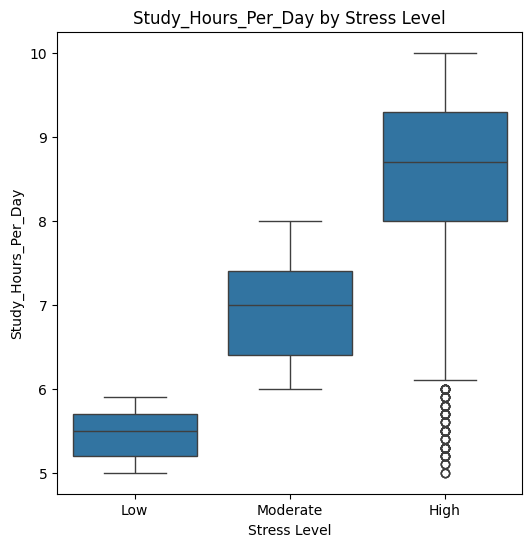

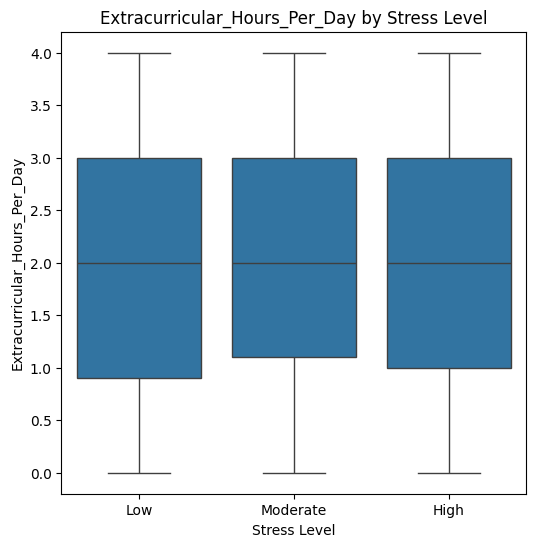

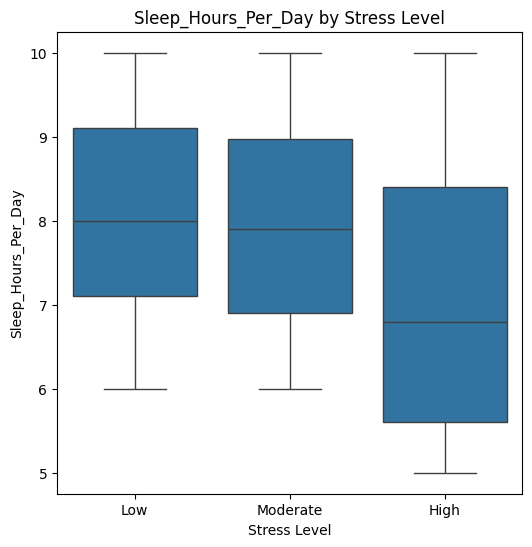

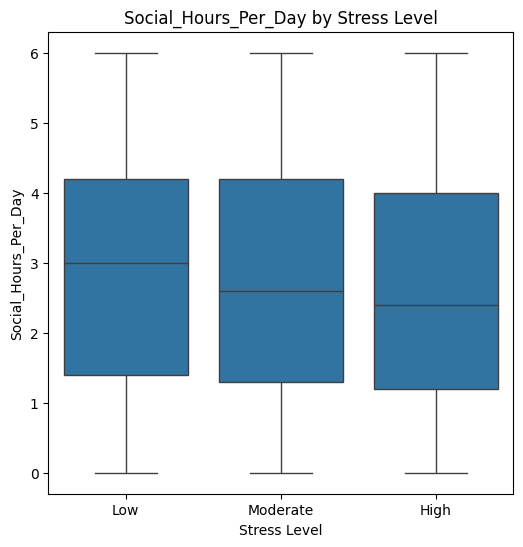

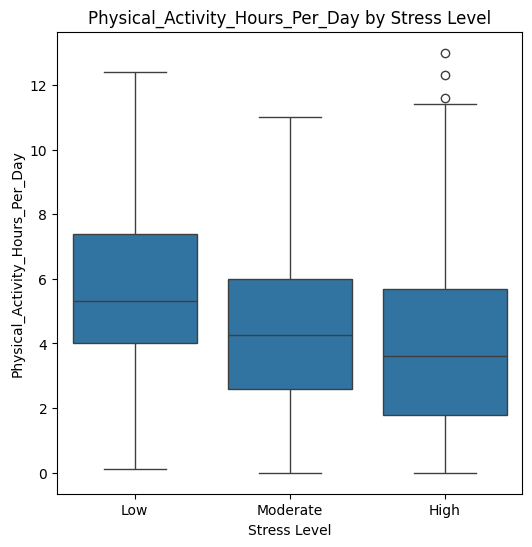

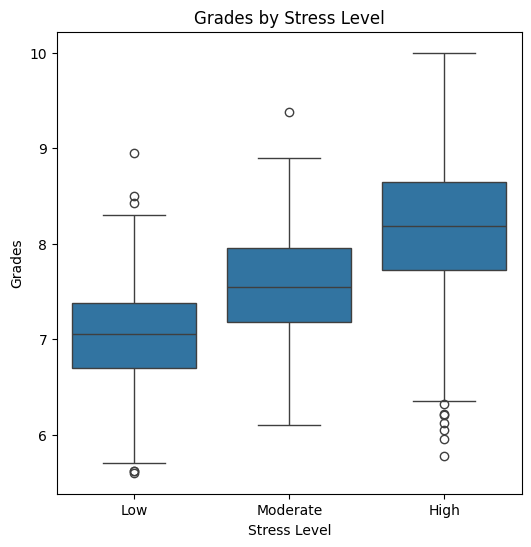

In [24]:
## Understanding relationship between variables
num_features = [
    "Study_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "Grades"
]

for col in num_features:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=df, x="Stress_Level", y=col,
                order=["Low", "Moderate", "High"])
    plt.xlabel("Stress Level")
    plt.ylabel(col)
    plt.title(f"{col} by Stress Level")
    plt.show()

**Study_Hours_Per_Day by Stress Level**

The boxplot comparing Study Hours across stress levels shows a clear upward trend: students with Low stress study the least, Moderate stress students study more and High stress students study the most. This pattern strongly suggests a positive relationship between academic workload and stress. The increasing median and wider spread for the high-stress group indicate that excessive study hours are associated with higher stress levels. This provides strong justification for including study hours as a key predictor.

**Extracurricular_Hours_Per_Day by Stress Level**

The boxplots for Extracurricular Hours show relatively similar medians across stress levels with substantial overlap between groups. This suggests that extracurricular involvement alone may not be a strong differentiator of stress levels. However, the variability within each group indicates that extracurricular activities may still play a moderating role when combined with other factors, such as study hours or sleep. This feature may contribute indirectly rather than acting as a dominant predictor.

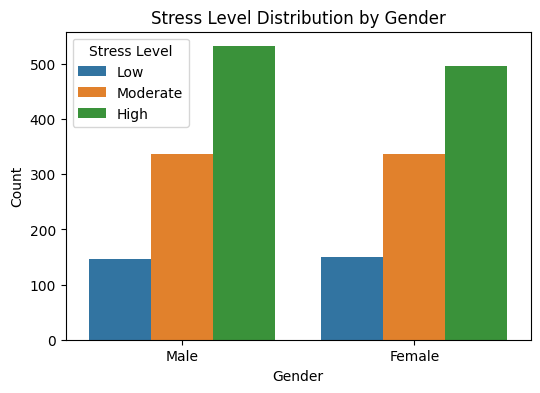

In [25]:
#Target and Categorical Feature
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue="Stress_Level",
              hue_order=["Low", "Moderate", "High"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Stress Level Distribution by Gender")
plt.legend(title="Stress Level")
plt.show()

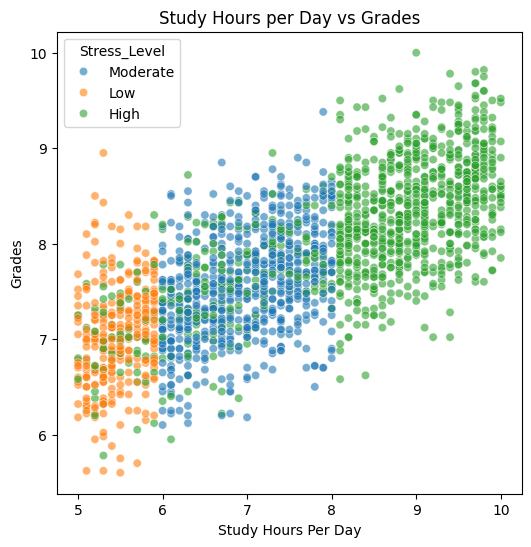

In [39]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df,
    x="Study_Hours_Per_Day",
    y="Grades",
    hue="Stress_Level",
    alpha=0.6
)
plt.title("Study Hours per Day vs Grades")
plt.xlabel("Study Hours Per Day")
plt.ylabel("Grades")
plt.show()

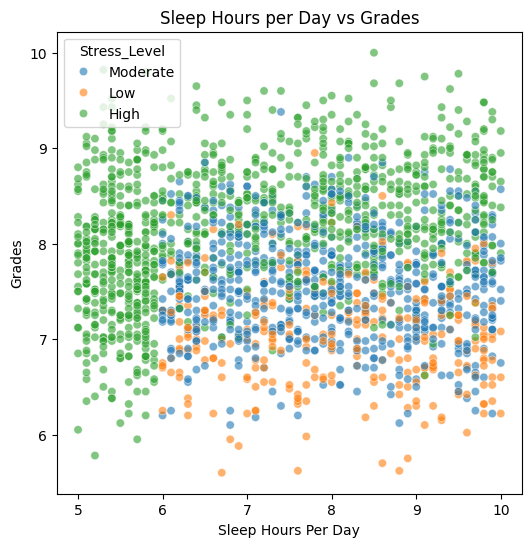

In [40]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df,
    x="Sleep_Hours_Per_Day",
    y="Grades",
    hue="Stress_Level",
    alpha=0.6
)
plt.title("Sleep Hours per Day vs Grades")
plt.xlabel("Sleep Hours Per Day")
plt.ylabel("Grades")
plt.show()

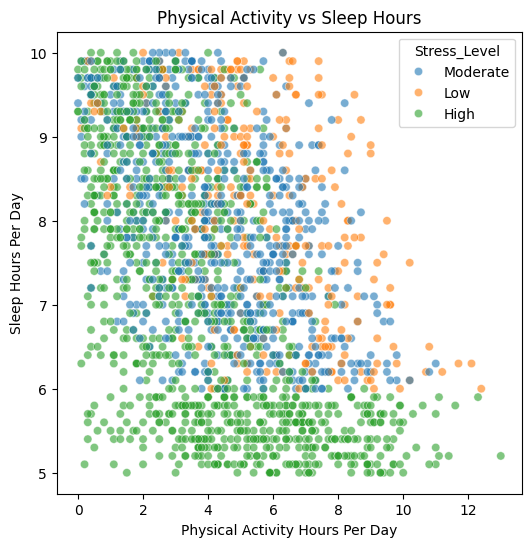

In [41]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data=df,
    x="Physical_Activity_Hours_Per_Day",
    y="Sleep_Hours_Per_Day",
    hue="Stress_Level",
    alpha=0.6
)
plt.title("Physical Activity vs Sleep Hours")
plt.xlabel("Physical Activity Hours Per Day")
plt.ylabel("Sleep Hours Per Day")
plt.show()


In [26]:
#Correlation
num_features = [
    "Study_Hours_Per_Day",
    "Extracurricular_Hours_Per_Day",
    "Sleep_Hours_Per_Day",
    "Social_Hours_Per_Day",
    "Physical_Activity_Hours_Per_Day",
    "Grades"
]

corr_matrix = df[num_features].corr()
corr_matrix

,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,Grades
Study_Hours_Per_Day,1.000000,-0.002629,0.026717,-0.137820,-0.488113,0.734401
Extracurricular_Hours_Per_Day,-0.002629,1.000000,0.008844,-0.139081,-0.369989,-0.032073
Sleep_Hours_Per_Day,0.026717,0.008844,1.000000,-0.193556,-0.470302,-0.004259
Social_Hours_Per_Day,-0.137820,-0.139081,-0.193556,1.000000,-0.417142,-0.085713
Physical_Activity_Hours_Per_Day,-0.488113,-0.369989,-0.470302,-0.417142,1.000000,-0.341148
Grades,0.734401,-0.032073,-0.004259,-0.085713,-0.341148,1.000000


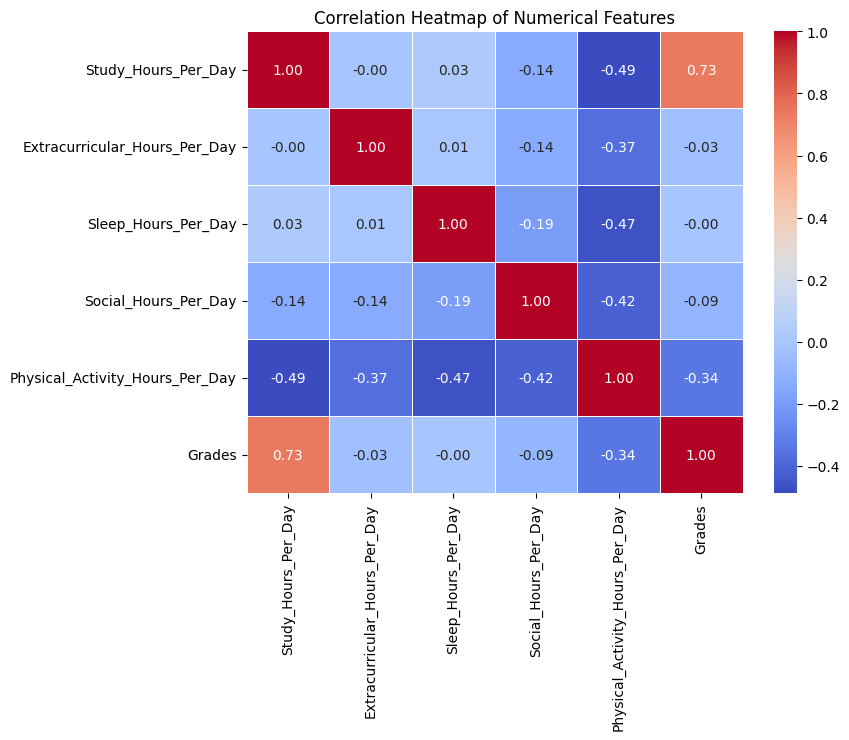

In [27]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 3. Data Preparation

## 3.1 Data Cleaning

In [28]:
## Clean data
# Drop identifier column
df_clean = df.drop(columns=["Student_ID", "Stress_Level"], axis=1)
X = df_clean
y = df["Stress_Level"]

In [29]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Optional: check mapping
dict(zip(le.classes_, le.transform(le.classes_)))

{'High': np.int64(0), 'Low': np.int64(1), 'Moderate': np.int64(2)}

In [30]:
X_encoded = pd.get_dummies(X, columns=["Gender"], drop_first=True)

In [31]:
df_clean.duplicated().sum()

np.int64(0)

In [32]:
df_clean.isna().sum()

Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
Gender                             0
Grades                             0
dtype: int64

## 3.2 Train-Test Split

In [33]:
## Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y_encoded,
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1400, 7)
X_test shape: (600, 7)


# 4. Modelling

### 4.2 Train Model

In [34]:
## Initialise and train model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)


# 5. Model Evaluation

In [35]:
## Evaluate model
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Logistic Regression Accuracy")
print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test  Accuracy: {test_acc:.3f}")

Logistic Regression Accuracy
Train Accuracy: 0.826
Test  Accuracy: 0.847


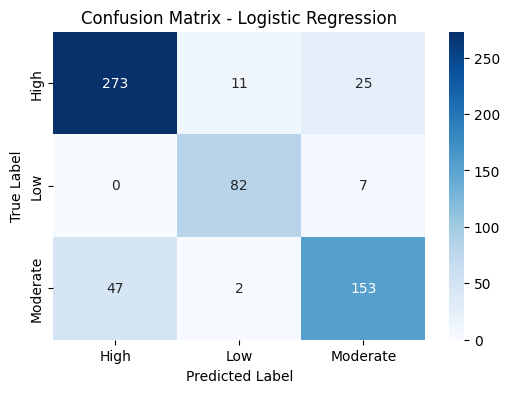

In [43]:
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

The confusion matrix shows that the Logistic Regression model performs well across all three stress level classes with most predictions concentrated along the diagonal which indicates correct classifications. For the High stress category, 273 out of 309 instances were correctly predicted while a small number were misclassified as Moderate (25) or Low (11). This suggests that while the model is generally effective at identifying highly stressed students, some overlap exists between High and Moderate stress levels which is expected given the gradual nature of stress rather than clear-cut boundaries.

For the Low stress category, the model performs particularly well. Out of 89 Low-stress students, 82 were correctly classified with only 7 misclassified as Moderate and none misclassified as High. This indicates that Low stress has relatively distinct patterns in the feature space making it easier for the model to separate from the other classes.

The Moderate stress category shows slightly weaker performance compared to the other two classes. While 153 out of 202 cases were correctly predicted, a noticeable number were misclassified as High stress (47). This suggests that Moderate stress shares similar characteristics with High stress leading to confusion between these two categories. This is a common issue in multi-class psychological or behavioral datasets where adjacent categories naturally overlap.

In [49]:
#Classification Report
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_test, target_names=le.classes_))


Classification Report - Logistic Regression
              precision    recall  f1-score   support

        High       0.85      0.88      0.87       309
         Low       0.86      0.92      0.89        89
    Moderate       0.83      0.76      0.79       202

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



The classification report shows the model’s balanced performance. Precision values range from 0.83 to 0.86, indicating that when the model predicts a stress level, it is correct most of the time. Recall values are highest for the Low stress class (0.92) which shows that the model is particularly effective at identifying students with low stress. The recall for Moderate stress (0.76) is comparatively lower reinforcing the observation that Moderate stress is harder to distinguish from High stress.

The F1-scores which balance precision and recall are strong across all classes with values of 0.87 for High, 0.89 for Low and 0.79 for Moderate. The slightly lower F1-score for Moderate stress highlights it as the most challenging class to model accurately.

The overall accuracy of 0.85 indicates that the model correctly classifies 85% of students in the test set. Additionally, the macro average and weighted average scores are both 0.85 which is suggesting that the model’s performance is consistent across classes and not overly biased toward the majority class.

Overall, Logistic Regression provides a strong baseline model for predicting student stress levels. Its performance is especially reliable for identifying Low and High stress students while Moderate stress remains more ambiguous due to overlapping behavioral patterns. This outcome justifies the use of Logistic Regression as a baseline model, as it offers interpretability and stable performance. However, the confusion between Moderate and High stress levels suggests that more flexible models such as Decision Trees/ Random Forest or ensemble methods may better capture non-linear relationships in the data.

## Random Forest (Other Model)

## Iterative model development


In [36]:
## Further feature engineering / feature selection